In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import datetime as dt


In [2]:
data = pd.read_csv("NAS.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [4]:
data.dropna(inplace = True)

In [5]:
data[['Year', 'Month', 'Date']] = data.Date.str.split("-", expand=True)

In [6]:
data['Date'] = data['Year'] + data['Month'] + data['Date']

In [7]:
data['Date'] = data['Date'].astype(int)

In [12]:
X = data.Date
y = data.Close

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
input = data.drop(['Volume', 'Adj Close','Close', 'Open', 'Low', 'High', 'Year', 'Month'], axis='columns')

In [15]:
input.head()

,Date
0,20031218
1,20031219
2,20031222
3,20031223
7,20031229


In [16]:
close = data.Close

In [17]:
close.head()

0    19.139799
1    18.454201
2    18.054300
3    17.425800
7    17.254400
Name: Close, dtype: float64

In [19]:
# Create linear regression object
regObj = linear_model.LinearRegression()
regObj.fit(input,close)

LinearRegression()

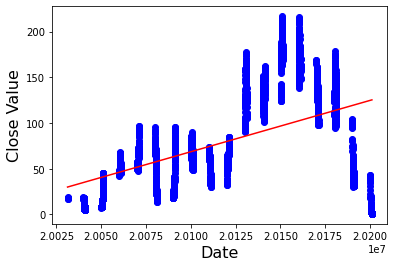

In [25]:
#%matplotlib inline
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Value',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(data.Date,data.Close,color='blue')
plt.plot(data.Date,regObj.predict(data[['Date']]),color='red')

In [21]:
regObj.predict([[20201030]])

array([125.35901922])

In [22]:
regObj.predict([[20040130]])

array([34.99227539])